In [71]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.vector_ar.irf import IRAnalysis
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
    # Please look at relationships between A_1 and A_2 as well as A_1 and A_3. Please do this for date range between 1st of Jan and 30th of Sep for a given calendar year. Are there any periods within this time frame when the relationships change significantly?
    # Please look at relationship between A_4 and A_5 as well as A_4 and A_6.
    # If there is anything at all that you can deduce from the data set, please highlight it. 

In [58]:
df = pd.read_csv("Test Data Set.csv",index_col=0)
df['Dates'] = pd.to_datetime(df['Dates'],dayfirst=True)
df = df.dropna(how="any")
cols = ['A_1', 'A_2', 'A_3', 'A_4', 'A_5', 'A_6']
df
# df.info()
# df.describe()

,Dates,A_1,A_2,A_3,A_4,A_5,A_6
0,2021-01-01,-30.350131,-1.649292,49.740842,0.34,7.42,5.12
2,2021-01-05,-22.041486,0.343078,49.351151,0.72,7.51,5.28
3,2021-01-06,-18.551989,7.660540,48.987410,0.90,7.92,4.68
5,2021-01-08,-9.791329,-0.185945,48.775638,0.99,8.87,4.80
6,2021-01-11,-11.579214,4.902499,48.922681,0.89,8.35,5.19
...,...,...,...,...,...,...,...
685,2023-08-18,40.080057,5.965446,27.702392,12.54,24.84,37.63
686,2023-08-21,38.404592,1.417818,27.702392,12.54,23.17,36.47
687,2023-08-22,36.125267,-1.829972,27.702392,12.54,24.36,37.78
688,2023-08-23,31.319452,-0.950582,27.702392,12.54,24.66,37.74


,A_1_x,A_2_x,A_3_x,A_4_x,A_5_x,A_6_x
A_1_y,1.0000,0.8366,0.9515,0.0022,0.3615,0.0000
A_2_y,0.9746,1.0000,0.4445,0.6472,0.0000,0.0956
A_3_y,0.9470,0.7645,1.0000,0.1548,0.6307,0.7993
A_4_y,0.0001,0.9262,0.1737,1.0000,0.0255,0.0014
A_5_y,0.6361,0.0869,0.4748,0.2281,1.0000,0.0242
A_6_y,0.0000,0.0263,0.2329,0.1868,0.3057,1.0000


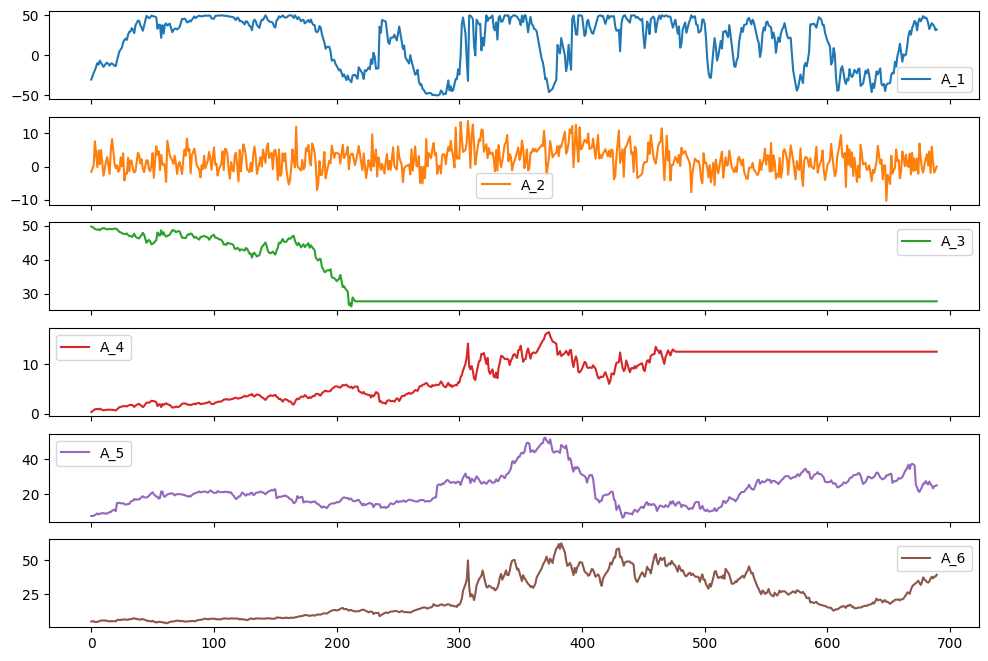

In [63]:
df[cols].plot(subplots=True, figsize=[12,8])
plt.show()

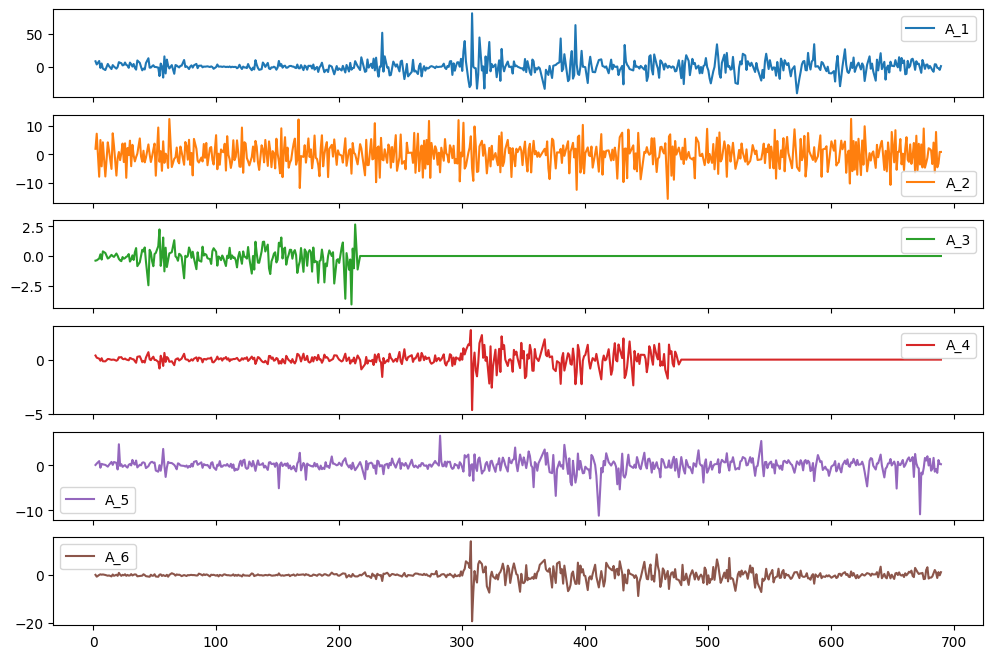

In [93]:
diff = df[cols].diff()
diff.plot(subplots=True,figsize=[12,8])
plt.show()

In [80]:
def adf_test(df,cols):
    for col in cols:

        sig_level = 0.05

        adf = adfuller(df[col].values,autolag='AIC')
        p_val = adf[1]

        if p_val <= sig_level:
            print(f"\npvalue = {p_val}, null hypothesis rejected")
            print(f"{col} is stationary")
        else:
            print(f"\npvalue = {p_val}, null hypothesis not rejected")
            print(f"{col} is non-stationary") 

adf_test(df,cols)


pvalue = 0.004237749883238217, null hypothesis rejected
A_1 is stationary

pvalue = 0.023043407634409267, null hypothesis rejected
A_2 is stationary

pvalue = 0.27549869287225226, null hypothesis not rejected
A_3 is non-stationary

pvalue = 0.5670381330115657, null hypothesis not rejected
A_4 is non-stationary

pvalue = 0.14119260402719902, null hypothesis not rejected
A_5 is non-stationary

pvalue = 0.6983537697538378, null hypothesis not rejected
A_6 is non-stationary


In [ ]:
def grangers_matrix(data, variables, test='ssr_chi2test'):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for col in df.columns:
        for row in df.index:
            test_result = grangercausalitytests(data[[row, col]].pct_change().dropna(), maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            df.loc[row, col] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

maxlag=10
grangers_matrix(df, cols, test='ssr_chi2test')

In [86]:
def year_split(df):
    yrs = df["Dates"].dt.year.unique()
    dfs = []

    for yr in yrs:
        dfs.append(df[df['Dates'].dt.year == yr])

    return dfs

yrs = year_split(df)

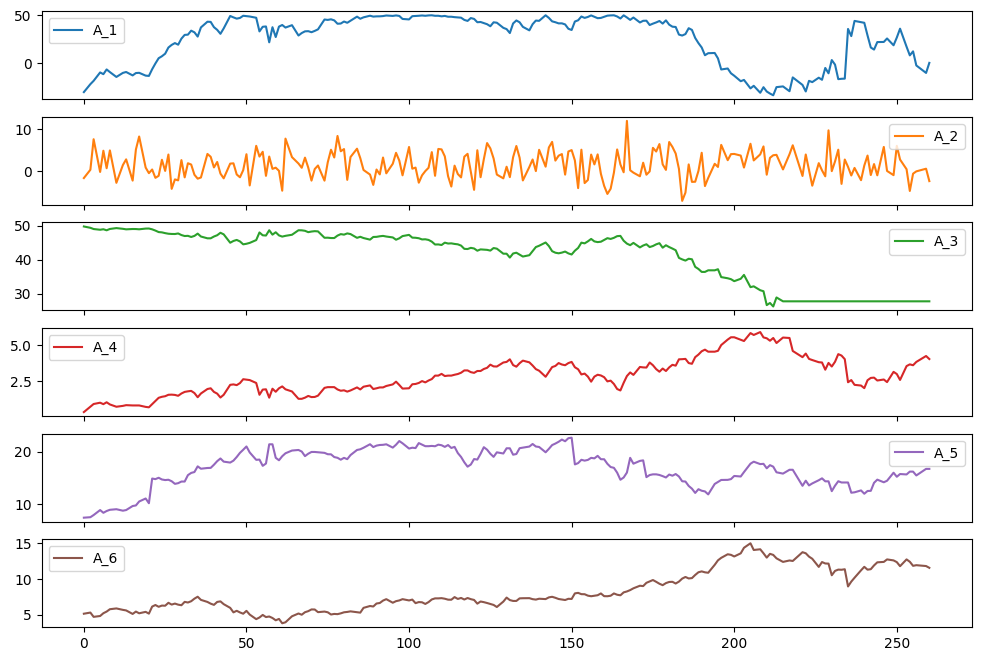

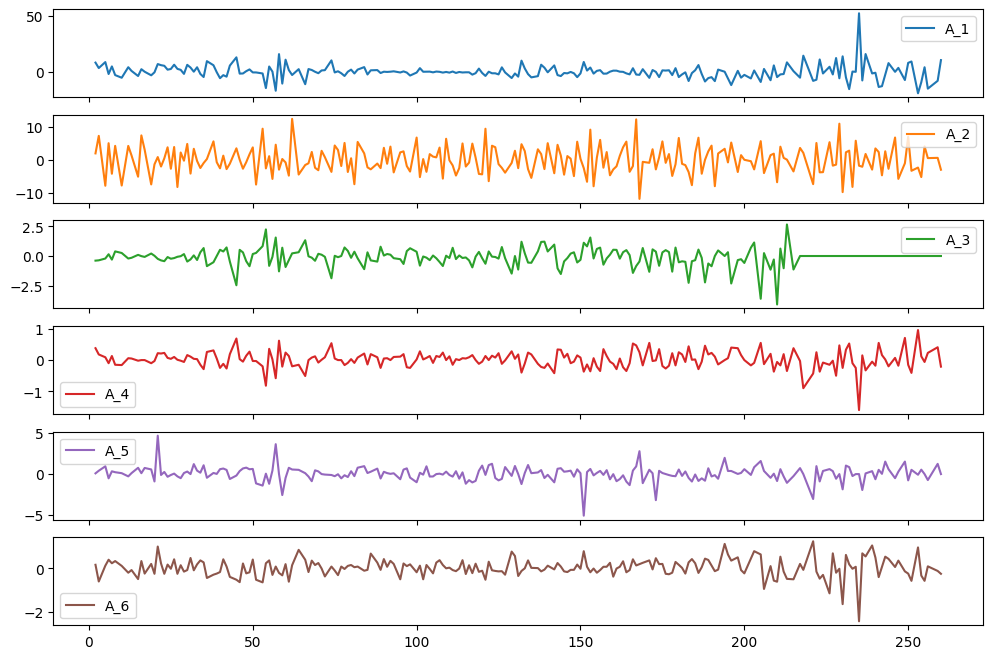


pvalue = 1.0001608260654624e-29, null hypothesis rejected
A_1 is stationary

pvalue = 5.640202605057088e-10, null hypothesis rejected
A_2 is stationary

pvalue = 8.47652707876003e-29, null hypothesis rejected
A_3 is stationary

pvalue = 9.582986763337682e-28, null hypothesis rejected
A_4 is stationary

pvalue = 8.4055056051302115e-22, null hypothesis rejected
A_5 is stationary

pvalue = 4.791731666345064e-05, null hypothesis rejected
A_6 is stationary












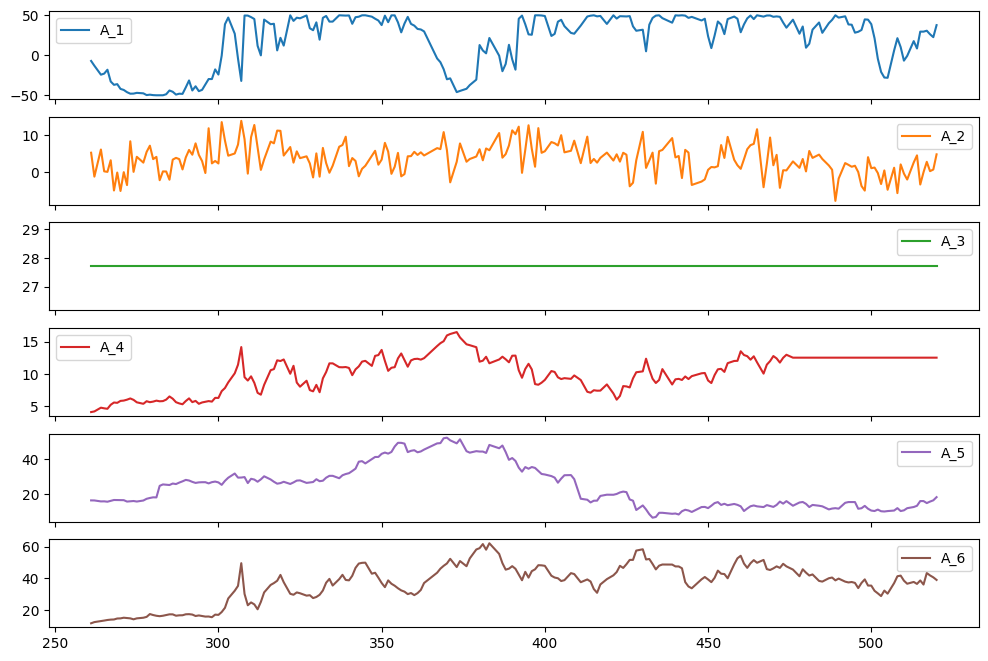

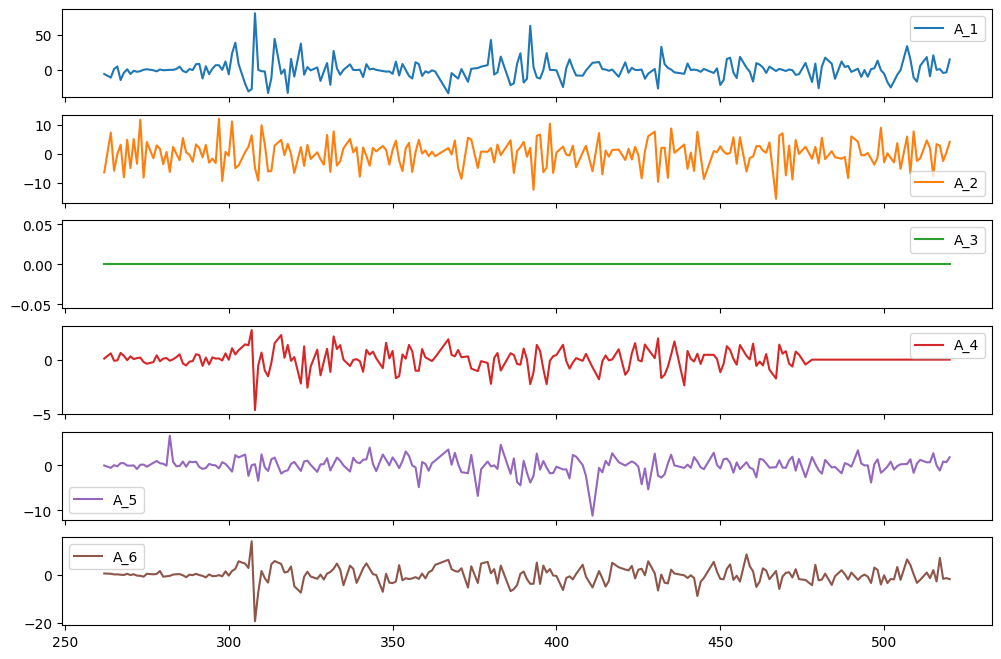


pvalue = 1.640457326460446e-17, null hypothesis rejected
A_1 is stationary

pvalue = 5.6909531782087515e-11, null hypothesis rejected
A_2 is stationary

pvalue = nan, null hypothesis not rejected
A_3 is non-stationary

pvalue = 0.0011633270145861656, null hypothesis rejected
A_4 is stationary

pvalue = 1.3124469264652773e-26, null hypothesis rejected
A_5 is stationary

pvalue = 1.9231952613798078e-26, null hypothesis rejected
A_6 is stationary












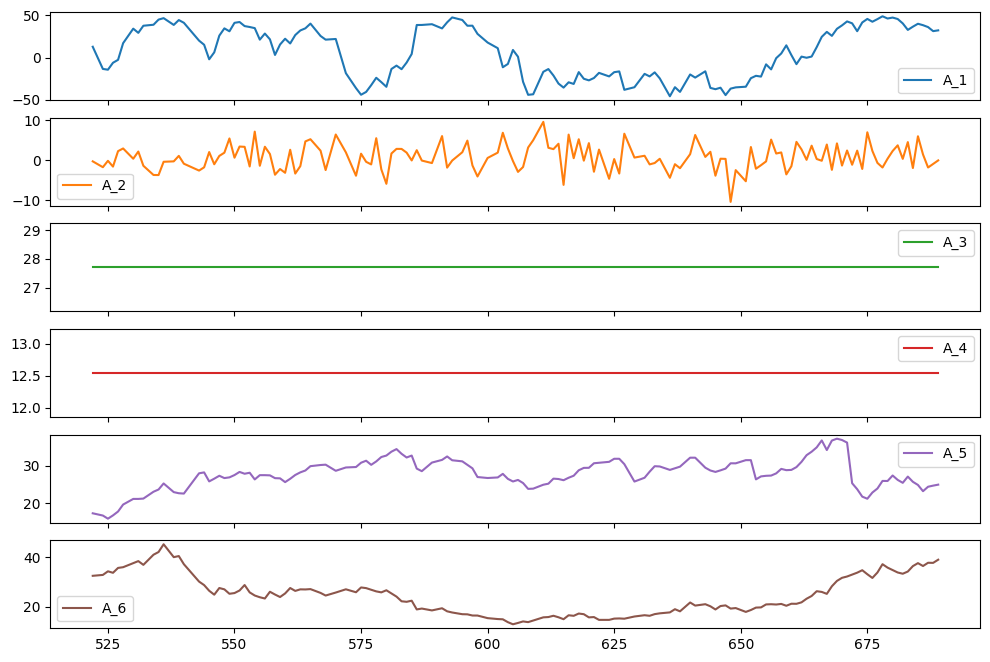

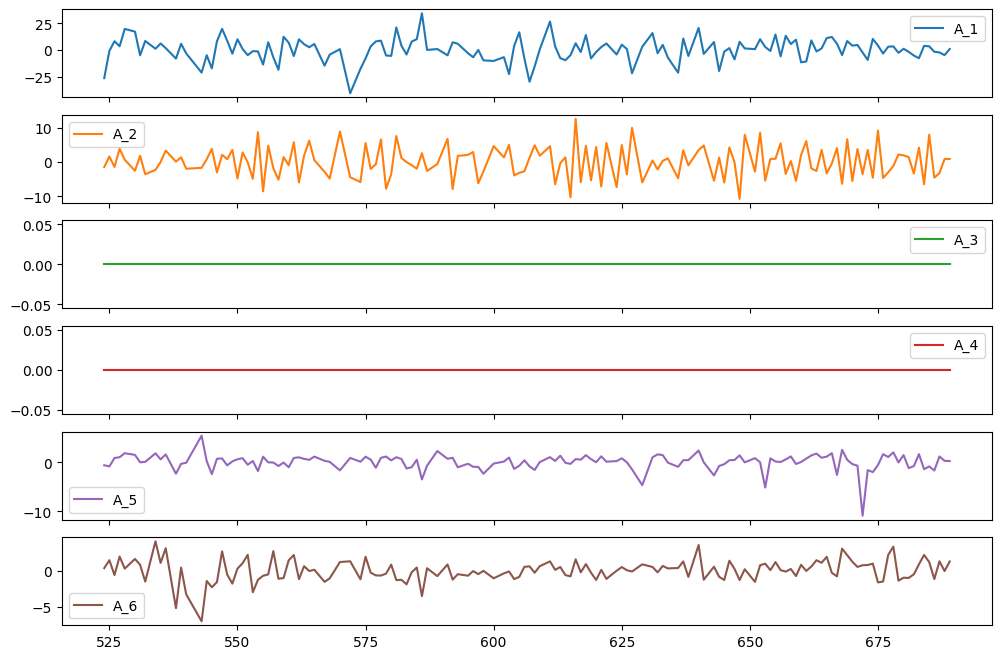


pvalue = 2.295853649544073e-19, null hypothesis rejected
A_1 is stationary

pvalue = 5.564200233092928e-10, null hypothesis rejected
A_2 is stationary

pvalue = nan, null hypothesis not rejected
A_3 is non-stationary

pvalue = nan, null hypothesis not rejected
A_4 is non-stationary

pvalue = 7.830215539522167e-19, null hypothesis rejected
A_5 is stationary

pvalue = 1.457230571519044e-20, null hypothesis rejected
A_6 is stationary












In [100]:
for yr in yrs:
    # adf_test(yr,cols)
    yr[cols].plot(subplots=True,figsize=[12,8])

    diff = yr[cols].diff().dropna()
    diff.plot(subplots=True,figsize=[12,8])
    plt.show()


    adf_test(diff,cols)
    print("\n\n\n\n\n\n\n\n\n")
